# Homework3: SQLAlchemy Homework - Surfs Up!

#### By raulfloresp / July 2020

## Import Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [5]:
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine = create_engine("sqlite:///hawaii.sqlite")
engine

Engine(sqlite:///hawaii.sqlite)

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis
* Design a query to retrieve the last 12 months of precipitation data and plot the results
* Calculate the date 1 year ago from the last data point in the database
* Perform a query to retrieve the data and precipitation scores
* Save the query results as a Pandas DataFrame and set the index to the date column
* Sort the dataframe by date
* Use Pandas Plotting with Matplotlib to plot the data

## Step 1 - Climate Analysis and Exploration
To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

#### Exploratory analysis of tables
Use the provided starter notebook and hawaii.sqlite files to complete your climate analysis and data exploration.

In [10]:
#Get the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Get a list of column names and types in measurement
columns_measurement = inspector.get_columns('measurement')
#columns_measurement
for c in columns_measurement:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Get a list of column names and types in station
columns_station = inspector.get_columns('station')
#columns_measurement
for c in columns_station:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


## Start Date + End Date calculations
Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

#### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [13]:
#Define the query for getting the last 12 months of precipitation data
engine.execute("select * from Measurement limit 12").fetchall()
session.query(func.count(Measurement.date)).all()

[(19550)]

#### Calculate the date 1 year ago from the last data point in the database

In [14]:
# Calculate the date 1 year ago from the last data point in the database
date_one_year = session.query(func.max(Measurement.date)).all()
date_one_year[0][0]

'2017-08-23'

In [15]:
final_date_one_year = date_one_year[0][0]
final_date = dt.datetime.strptime(final_date_one_year, "%Y-%m-%d")
begin_date = final_date - dt.timedelta(365)

#### Perform a query to retrieve the data and precipitation scores
We consider 12 months from the last data point of 2017-08-23, that means 2016-08-23

In [16]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= begin_date).all()
#precipitation_data

#### # Save the query results as a Pandas DataFrame and set the index to the date column

In [17]:
# Define the Pandas Dataframe
precipitation_data_df = pd.DataFrame(precipitation_data, columns=['date','prcp'])
precipitation_data_df = precipitation_data_df.set_index('date')
precipitation_data_df

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


#### Sort the dataframe by date

In [18]:
# Sort the dataframe by date
precipitation_data_df.sort_values(by='date', ascending = True)

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


#### Use Pandas Plotting with Matplotlib to plot the data

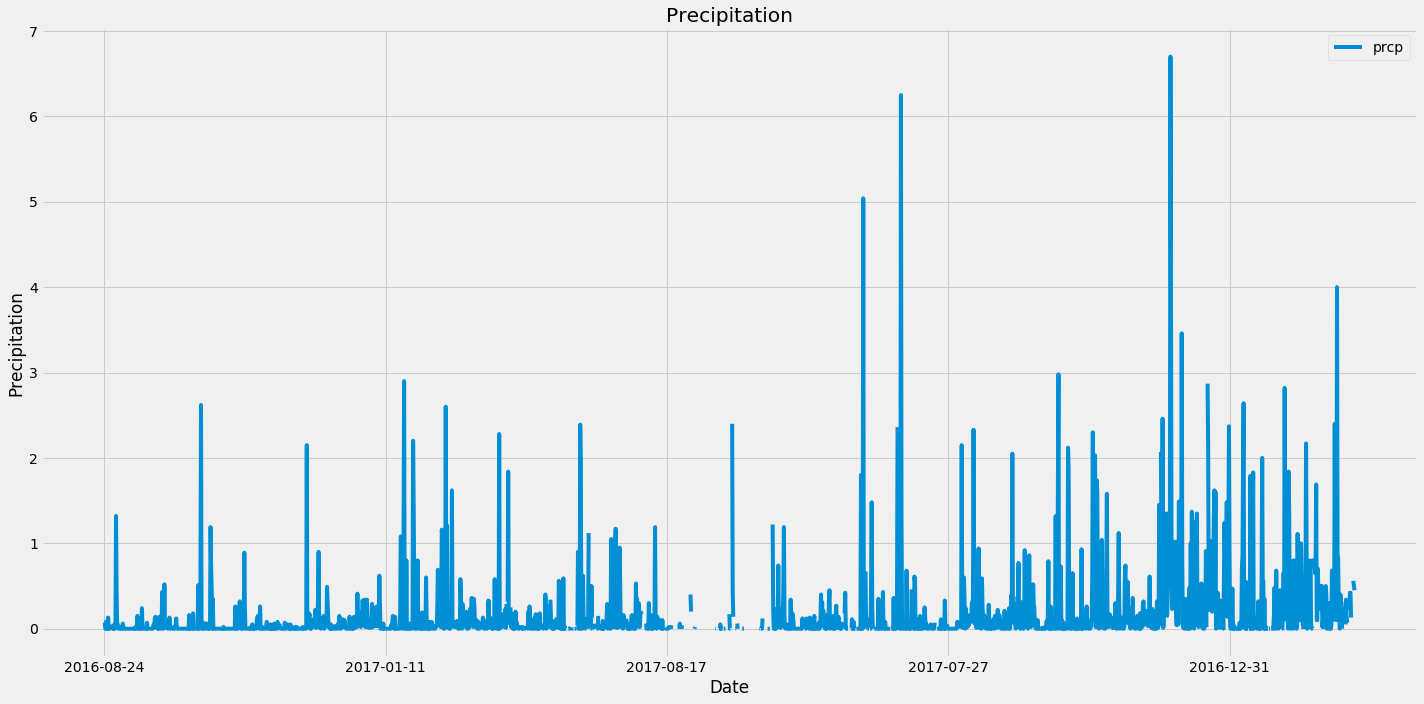

In [19]:
# Use Pandas with Matplotlib to plot the data
fig, my_plot = plt.subplots(figsize = (20, 10))
precipitation_data_df.plot(ax = my_plot, x_compat = True)

#title and labels
my_plot.set_xlabel('Date')
my_plot.set_ylabel('Precipitation')
my_plot.set_title("Precipitation")

#plot
plt.tight_layout()
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
stationsCount = session.query(Station).count()
print(f"The number of stations is: {stationsCount}")

The number of stations is: 9


In [22]:
# List of stations
results = session.query(Station.name).all()
all_stations = list(np.ravel(results))
all_stations

['WAIKIKI 717.2, HI US',
 'KANEOHE 838.1, HI US',
 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'PEARL CITY, HI US',
 'UPPER WAHIAWA 874.3, HI US',
 'WAIMANALO EXPERIMENTAL FARM, HI US',
 'WAIHEE 837.5, HI US',
 'HONOLULU OBSERVATORY 702.2, HI US',
 'MANOA LYON ARBO 785.2, HI US']

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)
                               ).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
#Find the most active stations.
active_stations_df = pd.DataFrame(active_stations, columns=['Station','Amount'])
active_stations_df = active_stations_df.reset_index()
active_stations_df

,index,Station,Amount
0,0,USC00519281,2772
1,1,USC00519397,2724
2,2,USC00513117,2709
3,3,USC00519523,2669
4,4,USC00516128,2612
5,5,USC00514830,2202
6,6,USC00511918,1979
7,7,USC00517948,1372
8,8,USC00518838,511


In [25]:
#What is the most active station
top_active_station = active_stations_df['Station'][0]
top_active_station

'USC00519281'

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#Calculate the lowest temperature
lowest_temperature = (session.query(Measurement.tobs).filter(Measurement.station == top_active_station)
                     .order_by(Measurement.tobs.asc()).first())
lowest_temperature = lowest_temperature[0]
print(f"The lowest temperature recorded there is {lowest_temperature} degrees Farenheit.")

The lowest temperature recorded there is 54.0 degrees Farenheit.


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#Calculate the highest temperature
highest_temperature = (session.query(Measurement.tobs).filter(Measurement.station == top_active_station)
                      .order_by(Measurement.tobs.desc()).first())
highest_temperature = highest_temperature[0]
print(f"The highest temperature recorded there is {highest_temperature} degrees Farenheit.")

The highest temperature recorded there is 85.0 degrees Farenheit.


In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#Calculate the average temperature
average_temperature = (session.query(func.avg(Measurement.tobs)).filter(Measurement.station == top_active_station))
average_temperature = '{0:.3}'.format(average_temperature[0][0])
print(f"The average temperature recorded there is {average_temperature} degrees Farenheit.")

The average temperature recorded there is 71.7 degrees Farenheit.


In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observation = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == top_active_station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= begin_date).all()

#save as a data frame
temperature_observation_df = pd.DataFrame(temperature_observation, columns = ['date', 'temperature'])
temperature_observation_df

,date,temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


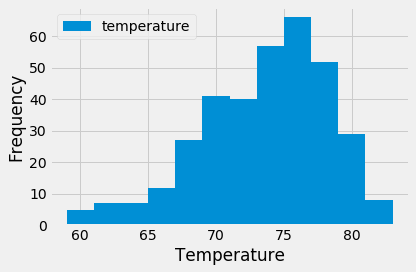

In [30]:
# Plotting
fig, ax = plt.subplots()
temperature_observation_df.plot.hist(bins = 12, ax = ax)

#labels
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

#plot
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#set trip dates and previous dates
start_date = '2017-08-13'
end_date = '2017-08-20'

#calculate the tmin, tavg, and tmax 
mytriptemps = calc_temps(start_date, end_date)

mytriptemps

[(70.0, 78.32352941176471, 85.0)]

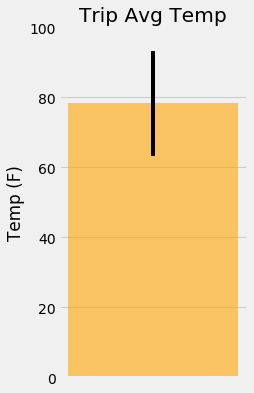

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

min_temp = mytriptemps[0][0]
avg_temp = mytriptemps[0][1]
max_temp = mytriptemps[0][2]

min_error = avg_temp - min_temp
max_error = max_temp - avg_temp

plt.figure(figsize=(3,6))
plt.bar(0, avg_temp, yerr=[max_temp-min_temp], color = 'orange', alpha=.6)
plt.title('Trip Avg Temp')
plt.ylim(0,100)
plt.ylabel('Temp (F)')
plt.xticks([])

plt.show()

In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = '2017-08-13'
end_date = '2017-08-20'

s = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= start_date)\
.filter(Measurement.date <= end_date)\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())

for row in s:
    rain="{0:.2f}".format(row[1])
    print (f"Station:  {row[0]}\n    Rainfall:  {rain}  \n    Location:  {row[2]}\n    Elevation:  {row[3]}  \
    Latitude:  {row[4]}  Longitude:  {row[5]}")
    print()

Station:  USC00516128
    Rainfall:  1.28  
    Location:  MANOA LYON ARBO 785.2, HI US
    Elevation:  152.4      Latitude:  21.3331  Longitude:  -157.8025

Station:  USC00519281
    Rainfall:  0.51  
    Location:  WAIHEE 837.5, HI US
    Elevation:  32.9      Latitude:  21.45167  Longitude:  -157.84888999999998

Station:  USC00519523
    Rainfall:  0.26  
    Location:  WAIMANALO EXPERIMENTAL FARM, HI US
    Elevation:  19.5      Latitude:  21.33556  Longitude:  -157.71139

Station:  USC00519397
    Rainfall:  0.02  
    Location:  WAIKIKI 717.2, HI US
    Elevation:  3.0      Latitude:  21.2716  Longitude:  -157.8168

Station:  USC00514830
    Rainfall:  0.02  
    Location:  KUALOA RANCH HEADQUARTERS 886.9, HI US
    Elevation:  7.0      Latitude:  21.5213  Longitude:  -157.8374



In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [58]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-13'
end_date = '2017-08-20'

# Use the start and end date to create a range of dates
from_date = int(start_date[-2:])
to_date = int(end_date[-2:])
days_duration = to_date - from_date + 1


# Stip off the year and save a list of %m-%d strings
start_Date = dt.datetime.strptime(start_date, '%Y-%m-%d')
dates_list = [dt.datetime.strftime(start_Date + dt.timedelta(days = x), '%m-%d') 
            for x in range(0, days_duration)]

# Loop through the list of %m-%d strings and calculate the normals for each date
trip_normals = [daily_normals(date) for date in dateList]
trip_normals

[[(71.0, 76.98245614035088, 84.0)],
 [(71.0, 76.77777777777777, 82.0)],
 [(69.0, 76.47169811320755, 83.0)],
 [(69.0, 76.08, 83.0)],
 [(69.0, 76.125, 83.0)],
 [(70.0, 76.92307692307692, 84.0)],
 [(69.0, 75.94642857142857, 85.0)],
 [(68.0, 76.45283018867924, 82.0)]]

In [60]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
type(trip_normals)
trip_normals_np = [np.array(normal[0]) for normal in trip_normals]
trip_normals_df = pd.DataFrame(trip_normals_np)
trip_normals_df.columns = ['low_temp', 'avg_temp', 'high_temp']
trip_normals_df['date'] = dates_list
trip_normals_df = trip_normals_df.set_index('date')
trip_normals_df

,low_temp,avg_temp,high_temp
date,,,
08-13,71.0,76.982456,84.0
08-14,71.0,76.777778,82.0
08-15,69.0,76.471698,83.0
08-16,69.0,76.080000,83.0
08-17,69.0,76.125000,83.0
08-18,70.0,76.923077,84.0
08-19,69.0,75.946429,85.0
08-20,68.0,76.452830,82.0


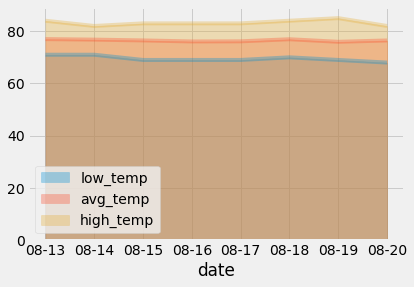

In [61]:
# Plot the daily normals as an area plot with `stacked=False`

#plot with pandas
trip_normals_df.plot.area(stacked=False, alpha=.333)

In [62]:
#End of Notebook